In [3]:
import numpy as np
import vtk
import glob
from scipy import interpolate

def load_vtk_as_array(filename):
    with open(filename, "r") as file:
        # 跳过文件头部信息
        while True:
            line = file.readline()
            if line.startswith("POINTS"):
                break

        # 解析点的数量
        num_points = int(line.split()[1])

        # 读取点的坐标数据
        points = []
        for _ in range(num_points):
            line = file.readline()
            point = list(map(float, line.split()))
            points.append(point)

        # 将点的坐标数据转换为NumPy数组格式
        points_array = np.array(points)

    return points_array

def save_curve_as_vtk(filename, curve_points):
    num_points = curve_points.shape[0]

    # 构建VTK文件的头部信息
    header = "# vtk DataFile Version 3.0\n"
    header += "3D Curve\n"
    header += "ASCII\n"
    header += "DATASET POLYDATA\n"

    # 构建点的信息
    points = "POINTS {} float\n".format(num_points)
    for point in curve_points:
        points += "{} {} {}\n".format(point[0], point[1], point[2])

    # 构建曲线的信息
    lines = "LINES 1 {}\n".format(num_points + 1)
    line_indices = np.arange(num_points)
    lines += "{} ".format(num_points)
    lines += " ".join(map(str, line_indices))
    lines += "\n"

    # 将头部信息、点的信息和曲线的信息合并成一个字符串
    vtk_data = header + points + lines

    # 将数据写入文件
    with open(filename, "w") as file:
        file.write(vtk_data)


files = glob.glob("./fine_tube/CenterlineExtend_correctindex/extended_centerline/*.vtk")
# 打开并加载VTK文件
curve = load_vtk_as_array(files[0])
print(curve.shape)


(81, 3)


[1.053342342, 1.087108731, 1.121266484, 1.139750481, 1.157848597, 1.20303297, 1.21760869, 1.2424227, 1.299420595, 1.336740375, 1.336614013, 1.329911113, 1.303038359, 1.329016805, 1.346059561, 1.36390543, 1.374476671, 1.419157624, 1.478562713, 1.508317828, 1.547112346, 1.587652087, 1.626566648, 1.652749419, 1.69316268, 1.715541244, 1.745096087, 1.755834818, 1.741676211, 1.705738902, 1.711310267, 1.746251941, 1.771996975, 1.787014008, 1.78533113, 1.7791574, 1.78536272, 1.76893425, 1.758482218, 1.757505655, 1.772947192, 1.788216114, 1.808946133, 1.797498822, 1.802049637, 1.848139048, 1.878620386, 1.893379092, 1.921338558, 1.95125854, 1.957001805, 1.918063641, 1.920689821, 1.925542116, 1.951863408, 1.989116549, 1.99358201, 2.028177261, 2.051894426, 2.046535969, 2.046438456, 2.040399551, 2.033119917, 1.994559526]
线性拟合结果：斜率 = 0.015031708285668499, 截距 = 1.1894614556576926
61


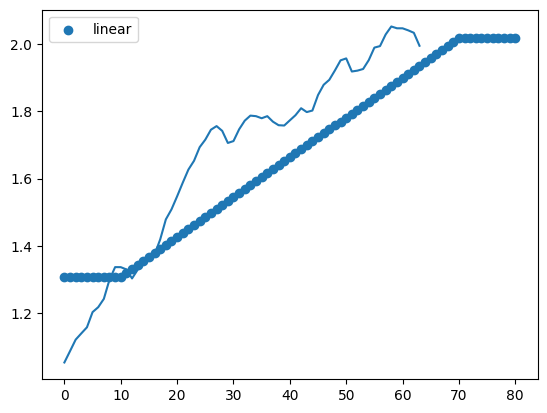

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
f = open("./mean_radius.txt", "r")
mean_radius = f.readlines()
for i in range(len(mean_radius)):
    mean_radius[i] = float(mean_radius[i])
f.close()
print (mean_radius)
plt.plot(mean_radius)

# 线性拟合
slope, intercept, r_value, p_value, std_err = stats.linregress(np.arange(len(mean_radius)), mean_radius)
print(f"线性拟合结果：斜率 = {slope}, 截距 = {intercept}")


# 补间到长度为tube_length
x_new = np.linspace(0, len(mean_radius)-1, len(mean_radius))
mean_radius_new = slope*x_new + intercept
# plt.plot(mean_radius_new)

new_r_length = 81
new_r_linear = np.ones(new_r_length)
curve_r_length = len(new_r_linear[10:-10])
print(curve_r_length)
x_new = np.linspace(0, len(mean_radius)-1, new_r_length)
new_r_linear[10:-10] = slope*x_new[10:-10] + intercept
new_r_linear[0:10] = new_r_linear[10]
new_r_linear[-10:] = new_r_linear[-11]
plt.scatter(range(len(new_r_linear)), new_r_linear,label="linear")
plt.legend()

a =  0.3036764922518784
b =  0.6894484040739866
60
81
57


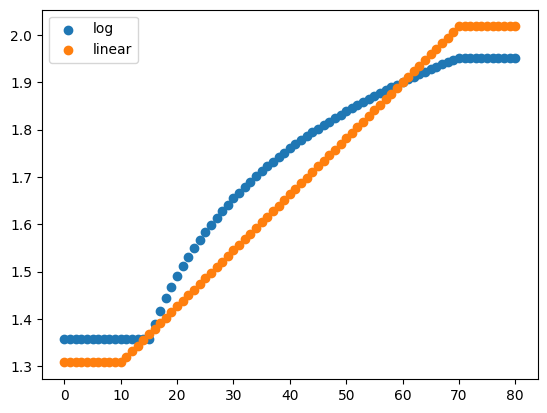

In [26]:
import numpy as np
from scipy.optimize import curve_fit

def log_func(x, a, b):
    return a * np.log(x) + b

n = len(mean_radius)
x = np.linspace(1, n, n)

# 使用curve_fit进行对数拟合
popt, pcov = curve_fit(log_func, x, mean_radius)

# 输出拟合结果
print("a = ", popt[0])
print("b = ", popt[1])

# 创建一个新的x轴数据，其长度为100
x_new = np.linspace(1, n, 64)

# 对新的x轴数据进行插值
mean_radius_interpolated = log_func(x_new, *popt)

# 输出插值结果
print(len(mean_radius_interpolated[4:]))
# plt.plot(mean_radius_interpolated)

print (new_r_length)
new_r_log = np.ones(new_r_length)
curve_r_length = len(new_r_log[14:-10])
print(curve_r_length)


new_r_log[15:-10] = mean_radius_interpolated[8:]
new_r_log[0:15] = new_r_log[15]
new_r_log[-10:] = new_r_log[-11]

plt.scatter(range(len(new_r_log)),new_r_log,label="log")
plt.scatter(range(len(new_r_linear)), new_r_linear,label="linear")
plt.legend()

In [27]:
import os
import shutil

# source_file = 'aaaa/bbb.vtk'
# destination_file = 'ccc/bbb.vtk'
# shutil.copyfile(source_file, destination_file)

def mkdir(loc,dirname):
    dir_path = loc+"{}/".format(dirname)
    if os.path.exists(dir_path)==False:
        print("making new directory {}...".format(dir_path))
        os.mkdir(dir_path)
    else:
        print("generating in directory {}...".format(dir_path))
    return dir_path

for idx in range(len(files)):
    source_file = files[idx]
    case_name =  files[idx].split("\\")[-1].split(".")[0][:-9]
    case_dir = mkdir("fine_tube/workspace/", case_name)
    destination_file = case_dir + case_name+"_extended.vtk"
    shutil.copyfile(source_file, destination_file)

generating in directory fine_tube/workspace/BG0002_Left/...
generating in directory fine_tube/workspace/BG0002_Right/...
generating in directory fine_tube/workspace/BG0014_Left/...
generating in directory fine_tube/workspace/BG0014_Right/...
generating in directory fine_tube/workspace/BG0019_Left/...
generating in directory fine_tube/workspace/BG0019_Right/...
generating in directory fine_tube/workspace/BG0020_Left/...
generating in directory fine_tube/workspace/BG0020_Right/...
generating in directory fine_tube/workspace/BG0021_Left/...
generating in directory fine_tube/workspace/BG0021_Right/...
generating in directory fine_tube/workspace/BG0022_Left/...
generating in directory fine_tube/workspace/BG0022_Right/...
generating in directory fine_tube/workspace/BG04_Left/...
generating in directory fine_tube/workspace/BG04_Right/...
generating in directory fine_tube/workspace/BG09_Left/...
generating in directory fine_tube/workspace/BG09_Right/...
generating in directory fine_tube/worksp

In [28]:
import numpy as np
import vtk

def write_tube_to_vtk(curve, r, filename, num_segments, NumberOfSides=60):
    # Create a vtkPoints object and store the points in it
    points = vtk.vtkPoints()
    for point in curve:
        points.InsertNextPoint(point)
    
    # Create a vtkParametricSpline object and set the points
    spline = vtk.vtkParametricSpline()
    spline.SetPoints(points)
    
    # Generate the curve using vtkParametricFunctionSource
    functionSource = vtk.vtkParametricFunctionSource()
    functionSource.SetParametricFunction(spline)
    functionSource.SetUResolution(num_segments)
    functionSource.Update()
    
    # Create a vtkDoubleArray to store radius information
    radiusData = vtk.vtkDoubleArray()
    radiusData.SetName('TubeRadius')
    for radius in r:
        radiusData.InsertNextValue(radius)

    # Add radius data to the points in polyData
    functionSource.GetOutput().GetPointData().AddArray(radiusData)
    functionSource.GetOutput().GetPointData().SetActiveScalars('TubeRadius')

    # Create tube filter
    tubeFilter = vtk.vtkTubeFilter()
    tubeFilter.SetInputData(functionSource.GetOutput())
    tubeFilter.SetVaryRadiusToVaryRadiusByScalar()
    tubeFilter.SetNumberOfSides(NumberOfSides)
    tubeFilter.Update()
    
    # Write the file
    writer = vtk.vtkPolyDataWriter()
    writer.SetFileName(filename)
    writer.SetInputData(tubeFilter.GetOutput())
    writer.Write()

def write_tube_to_vtk2(curve, r, filename, num_segments, NumberOfSides=60):
    # Create a vtkPoints object and store the points in it
    points = vtk.vtkPoints()
    for point in curve:
        points.InsertNextPoint(point)
    
    # Create a vtkParametricSpline object and set the points
    spline = vtk.vtkParametricSpline()
    spline.SetPoints(points)
    
    # Generate the curve using vtkParametricFunctionSource
    functionSource = vtk.vtkParametricFunctionSource()
    functionSource.SetParametricFunction(spline)
    functionSource.SetUResolution(num_segments)
    functionSource.Update()
    
    # Create a vtkDoubleArray to store radius information
    radiusData = vtk.vtkDoubleArray()
    radiusData.SetName('TubeRadius')
    for radius in r:
        radiusData.InsertNextValue(radius)

    # Add radius data to the points in polyData
    functionSource.GetOutput().GetPointData().AddArray(radiusData)
    functionSource.GetOutput().GetPointData().SetActiveScalars('TubeRadius')

    # Create tube filter
    tubeFilter = vtk.vtkTubeFilter()
    tubeFilter.SetInputData(functionSource.GetOutput())
    # tubeFilter.SetVaryRadiusToVaryRadiusByScalar(r)
    radius=1.2
    tubeFilter.SetRadius(radius)
    tubeFilter.SetNumberOfSides(NumberOfSides)
    tubeFilter.Update()
    self_intersection_threshold=1e-3
    # Check for self-intersection

    # Write the file
    writer = vtk.vtkPolyDataWriter()
    writer.SetFileName(filename)
    writer.SetInputData(tubeFilter.GetOutput())
    writer.Write()

# Call the function to write the tube to .vtk file
num_segments = 300
# write_tube_to_vtk(curve2, r2, "tube.vtk", num_segments=num_segments)


In [29]:
def convert_vtk_to_stl(input_vtk_filename, output_stl_filename):
    # Read the .vtk file
    reader = vtk.vtkPolyDataReader()
    reader.SetFileName(input_vtk_filename)
    reader.Update()

    # Write the .stl file
    stlWriter = vtk.vtkSTLWriter()
    stlWriter.SetFileName(output_stl_filename)
    stlWriter.SetInputData(reader.GetOutput())
    stlWriter.Write()

# Call the function to convert the .vtk file to .stl
# convert_vtk_to_stl("tube.vtk", "tube.stl")

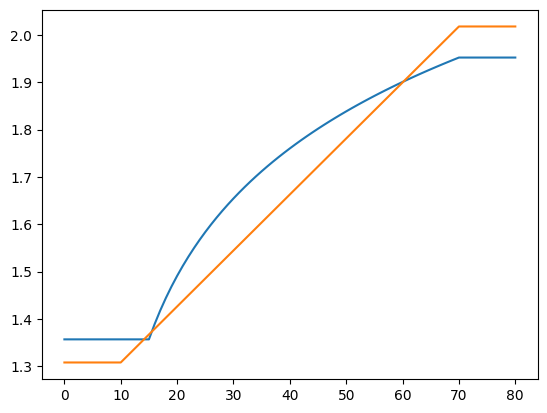

In [30]:
plt.plot(new_r_log)
plt.plot(new_r_linear)

In [35]:
num_segments = 300
max_pt_length = 1000
for idx in range(len(files)):
    # print (files[idx])
    # print (r_files[idx])
    filename = files[idx].split("\\")[-1].split(".")[0][:-9]
    print (filename)
    # Replace with your own data
    # curve = np.load(files[idx], allow_pickle=True)
    curve = load_vtk_as_array(files[idx])
    x=range(len(curve))
    print ("x:", x)
    z2 = np.linspace(0,len(curve), max_pt_length)
    print ("z2:", z2)
    c_interpolation = interpolate.CubicSpline(x, curve)
    curve2 = c_interpolation(z2)
    #r2=np.ones(max_pt_length)*2.4
    r_interpolation = interpolate.interp1d(x, new_r_linear)
    radius_linear = r_interpolation(z2)
    r_log_interpolation = interpolate.interp1d(x, new_r_log)
    radius_log = r_log_interpolation(z2)

    write_tube_to_vtk(curve2, radius_linear, "fine_tube/vtk/{}_linear.vtk".format(filename), num_segments=num_segments, NumberOfSides=60)
    write_tube_to_vtk(curve2, radius_log, "fine_tube/vtk/{}_log.vtk".format(filename), num_segments=num_segments, NumberOfSides=60)
    # write_tube_to_vtk2(curve2, r2, "fine_tube/vtk/{}_300.vtk".format(filename), num_segments=num_segments)
    # case_dir = mkdir("fine_tube/workspace/", filename)
    # # write_tube_to_vtk(curve2, r2, case_dir+"{}.vtk".format(filename), num_segments=num_segments)
    # save_curve_as_vtk("fine_tube/interpolated_centerline/{}.vtk".format(filename), curve2)
    # save_curve_as_vtk(case_dir+"{}_centerline_interpolated.vtk".format(filename), curve2)

BG0002_Left
x: range(0, 81)
z2: [ 0.          0.08108108  0.16216216  0.24324324  0.32432432  0.40540541
  0.48648649  0.56756757  0.64864865  0.72972973  0.81081081  0.89189189
  0.97297297  1.05405405  1.13513514  1.21621622  1.2972973   1.37837838
  1.45945946  1.54054054  1.62162162  1.7027027   1.78378378  1.86486486
  1.94594595  2.02702703  2.10810811  2.18918919  2.27027027  2.35135135
  2.43243243  2.51351351  2.59459459  2.67567568  2.75675676  2.83783784
  2.91891892  3.          3.08108108  3.16216216  3.24324324  3.32432432
  3.40540541  3.48648649  3.56756757  3.64864865  3.72972973  3.81081081
  3.89189189  3.97297297  4.05405405  4.13513514  4.21621622  4.2972973
  4.37837838  4.45945946  4.54054054  4.62162162  4.7027027   4.78378378
  4.86486486  4.94594595  5.02702703  5.10810811  5.18918919  5.27027027
  5.35135135  5.43243243  5.51351351  5.59459459  5.67567568  5.75675676
  5.83783784  5.91891892  6.          6.08108108  6.16216216  6.24324324
  6.32432432  6.4054

ValueError: A value (80.02702702702703) in x_new is above the interpolation range's maximum value (80).

In [ ]:
vtk_tubes = glob.glob("D:/!BraVa_src/src/ModeDecomposition/fine_tube/vtk/*.vtk")
# print (vtk_tubes)
for v in vtk_tubes:
    name = v.split("/")[-1].split("\\")[-1].split(".")[0]
    print (name)
    case_dir = mkdir("fine_tube/workspace/", name)
    stl_path = case_dir+name+".stl"
    # convert_vtk_to_stl(v, stl_path)

BG0002_Left_log
generating in directory fine_tube/workspace/BG0002_Left_log/...
BG0002_Right_log
generating in directory fine_tube/workspace/BG0002_Right_log/...
BG0014_Left_log
generating in directory fine_tube/workspace/BG0014_Left_log/...
BG0014_Right_log
generating in directory fine_tube/workspace/BG0014_Right_log/...
BG0019_Left_log
generating in directory fine_tube/workspace/BG0019_Left_log/...
BG0019_Right_log
generating in directory fine_tube/workspace/BG0019_Right_log/...
BG0020_Left_log
generating in directory fine_tube/workspace/BG0020_Left_log/...
BG0020_Right_log
generating in directory fine_tube/workspace/BG0020_Right_log/...
BG0021_Left_log
generating in directory fine_tube/workspace/BG0021_Left_log/...
BG0021_Right_log
generating in directory fine_tube/workspace/BG0021_Right_log/...
BG0022_Left_log
generating in directory fine_tube/workspace/BG0022_Left_log/...
BG0022_Right_log
generating in directory fine_tube/workspace/BG0022_Right_log/...
BG04_Left_log
generating in 

In [ ]:
import pyvista as pv

vtk_file_path = "D:/!BraVa_src/src/ModeDecomposition/fine_tube/vtk/BG0002_Right.vtk"
stl_file_path = "D:/!BraVa_src/src/ModeDecomposition/fine_tube/stl/BG0002_Right.stl"
reader = vtk.vtkGenericDataObjectReader()
reader.SetFileName(vtk_file_path)
reader.Update()
polydata = reader.GetOutput()
pts = polydata.GetPoints()    
np_pts = np.array([pts.GetPoint(i) for i in range(pts.GetNumberOfPoints())])
print (np_pts.shape)

ERROR:root:Unable to open file: D:/!BraVa_src/src/ModeDecomposition/fine_tube/vtk/BG0002_Right.vtk
ERROR:root:Unable to open file: D:/!BraVa_src/src/ModeDecomposition/fine_tube/vtk/BG0002_Right.vtk
ERROR:root:Unable to open file: D:/!BraVa_src/src/ModeDecomposition/fine_tube/vtk/BG0002_Right.vtk
ERROR:root:Could not read file D:/!BraVa_src/src/ModeDecomposition/fine_tube/vtk/BG0002_Right.vtk
ERROR:root:Algorithm vtkGenericDataObjectReader (0000021DCB3480F0) returned failure for request: vtkInformation (0000021DCA5C2F30)


AttributeError: 'vtkmodules.vtkCommonDataModel.vtkDataObject' object has no attribute 'GetPoints'

In [ ]:
import myvtk.GetMakeVtk as GetVtk

GetVtk.GetMyVtk